# Pendahuluan

Dataset merupakan informasi mengenai penjualan game di berbagai platform sampai tahun 2016.

Dari informasi yang didapatkan di dataset akan digunakan untuk menentukan periode tahun analisa dan menjawab beberapa pertanyaan yang diajukan :

    1. 5 top platform yang memiliki potensi keuntungan di tahun 2017.
    
    2. 5 top genre yang memiliki potensi keuntungan di tahun 2017.
    
    3. Preferensi pengguna pada wilayah NA, EU dan JP.
    
    4. Pengujian hipotesis atas pertanyaan :
           
           a. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
           
           b. Rata-rata rating pengguna genre Action dan Sports berbeda.

Informasi ini akan digunakan oleh Ice untuk penjualan di tahun 2017.

# Inisialisasi

In [5]:
# Memuat library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [6]:
# Fungsi menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Memuat Data

In [7]:
#Memuat data

try :
    df = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 5\dataset\games.csv')

except :
    df = pd.read_csv('/datasets/games.csv')


# Mempersiapkan Data

In [8]:
# Informasi umum data

print('Jumlah baris dan kolom data :', df.shape)
print()
print(df.info())

Jumlah baris dan kolom data : (16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [9]:
# Deskripsi umum data
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [10]:
# Cek duplikat explisit data
df.duplicated().sum()

0

In [11]:
# Cek nilai yang hilang dalam data

df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [12]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

## Kesimpulan

Data merupakan informasi penjualan sampai tahun 2016.

Dimana setiap kolomnya memiliki informasi :

— Name : Judul games.

— Platform : Media games dimainkan.

— Year_of_Release : Tahun games di rilis.

— Genre : Jenis aliran games.

— NA_sales : Penjualan di Amerika Utara dalam satuan juta USD.

— EU_sales : Penjualan di Eropa dalam satuan juta USD.

— JP_sales : Penjualan di Jepang dalam satuan juta USD.

— Other_sales : Penjualan di negara lainnya dalam satuan juta USD.

— Critic_Score : Skor ulasan dari kritikus, maksimal 100.

— User_Score : skor ulasan dari pengguna, maksimal 10.

— Rating : Peringkat Entertainment Software Rating Board (ESRB)
    
    

Tidak terdapat dulplikat eksplisit dalam data.

Data memiliki masalah yang perlu diperbaiki :

   1. Gaya penulisan kolom tidak snake_case.
    
   2. Terdapat nilai yang hilang pada kolom `Name`.
    
   3. Terdapat nilai yang hilang pada kolom `Year_of_Release`.
   
   4. Terdapat nilai yang hilang pada kolom `Genre`.
    
   5. Terdapat nilai yang hilang pada kolom `Critic_Score`.
   
   6. Tipe data kolom `User_score` Object.
    
   7. Terdapat nilai yang hilang pada kolom `User_Score`.
    
   8. Terdapat nilai yang hilang pada kolom `Rating`.

# Memperbaiki Data

## Memperbaiki nama kolom

In [13]:
# Lower case nama kolom
df.columns = df.columns.str.lower()

In [14]:
# Cek perubahan nama kolom
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Memperbaiki nilai yang hilang pada kolom `name` 

In [15]:
# Cek data kolom name yang memiliki nilai yang hilang
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Karena data ini memiliki nilai penjualan yang cukup besar, akan di isi dengan nama *unknown*. Kemungkinan ini terjadi karena judul dari game tersebut ditulis bukan dalam huruf alphabet.

In [16]:
# Isi nilai yang hilang dengan unkown
df['name'] = df['name'].fillna('unknown')

In [17]:
# Cek perubahan data
df.query('name == "unknown"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


## Memperbaiki nilai yang hilang pada kolom `year_of_release` 

In [18]:
# Cek data kolom name yang memiliki nilai yang hilang
df[df['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [19]:
# Cek nama game yang sama
df.query('name == "Space Invaders"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Jika dilihat dengan nama games yang sama memiliki tahun rilis yang berbeda pada platform yang berbeda. Untuk mengisi nilai yang hilang pada `year_of_release` akan digunakan nilai median per `platform`.

In [20]:
# Median per platform
year = df.groupby('platform')['year_of_release'].median()

# Fungsi mengganti nilai yang hilang
def change_year(row):
    platform = row['platform']
    return year[platform]

# Aplikasi ke kolom baru
df['year_change'] = df[(df['year_of_release'].isnull())].apply(change_year, axis=1)


In [21]:
# Aplikasi ke kolom year_of_release
df['year_of_release'] = df['year_of_release'].fillna(df['year_change'])

In [22]:
# Cek perubahan data
df.isna().sum()

name                   0
platform               0
year_of_release        0
genre                  2
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8578
user_score          6701
rating              6766
year_change        16446
dtype: int64

## Memperbaiki nilai yang hilang pada kolom `genre` 

In [23]:
# Cek kategori genre
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Nilai yang hilang akan di isi dengan *Misc*.

In [24]:
# Ganti dengan Misc
df['genre'] = df['genre'].fillna('Misc')

In [25]:
# Cek perubahan Genre
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [26]:
# Cek perubahan data
df.isna().sum()

name                   0
platform               0
year_of_release        0
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8578
user_score          6701
rating              6766
year_change        16446
dtype: int64

## Memperbaiki nilai yang hilang pada kolom `critic_score` 

In [27]:
# Cek data kolom name yang memiliki nilai yang hilang
df[df['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_change
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,NaN


In [28]:
# Cek median dan mean critic score
df[df['critic_score'].notna()].pivot_table(index='genre', values='critic_score', aggfunc=['median', 'mean'])

,median,mean
,critic_score,critic_score
genre,,
Action,68.0,66.629101
Adventure,66.0,65.331269
Fighting,72.0,69.217604
Misc,69.0,66.619503
Platform,69.0,68.058350
Puzzle,70.0,67.424107
Racing,69.0,67.963612
Role-Playing,74.0,72.652646


Nilai yang hilang akan diisi dengan nilai rata-rata `critic_score` per `genre`.

In [29]:
# Rata-rata critic score per genre
critic_avg = df[df['critic_score'].notna()].groupby('genre')['critic_score'].mean()

# Fungsi mengganti nilai yang hilang
def change_critic(row):
    genre = row['genre']
    return critic_avg[genre]

# Aplikasi ke kolom baru
df['critic_change'] = df[(df['critic_score'].isnull())].apply(change_critic, axis=1)


In [30]:
# Aplikasi ke kolom critic_score
df['critic_score'] = df['critic_score'].fillna(df['critic_change'])

In [31]:
# Cek perubahan data
df.isna().sum()

name                   0
platform               0
year_of_release        0
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score           0
user_score          6701
rating              6766
year_change        16446
critic_change       8137
dtype: int64

## Mengganti tipe data kolom `user_score` 

In [32]:
# Nilai kolom user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Terdapat rating *tbd*, tbd (to be determined) berarti rating belum ditentukan dari sumbernya. Karena akan mempengaruhi analisa, rating *tbd* akan di ganti dengan rating rata-rata per *genre*. Agar dapat dirubah menjadi tipe float, *tbd* akan diganti menjadi nan.

In [33]:
# Ganti nilai tbd dengan Nan
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [34]:
# Cek perubahan nilai
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [35]:
# Ganti ke tipe float
df['user_score'] = df['user_score'].astype('float')

In [36]:
# Cek perubahan tipe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  year_change      269 non-null    float64
 12  critic_change    8578 non-null   float64
dtypes: float64(9), object(4)
memory usage: 1.7+ MB


## Memperbaiki nilai yang hilang pada kolom `user_score` 

In [37]:
# Cek data kolom name yang memiliki nilai yang hilang
df[df['user_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_change,critic_change
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.058350,NaN,NaN,NaN,68.058350
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.652646,NaN,NaN,NaN,72.652646
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,67.424107,NaN,NaN,NaN,67.424107
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,70.181144,NaN,NaN,NaN,70.181144
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,68.619318,NaN,NaN,NaN,68.619318


In [38]:
# Cek median dan mean user score
df[df['user_score'].notna()].pivot_table(index='genre', values='user_score', aggfunc=['median', 'mean'])

,median,mean
,user_score,user_score
genre,,
Action,7.4,7.054044
Adventure,7.6,7.133000
Fighting,7.6,7.302506
Misc,7.1,6.819362
Platform,7.7,7.301402
Puzzle,7.5,7.175000
Racing,7.4,7.036193
Role-Playing,7.8,7.619515


Nilai yang hilang akan diisi dengan nilai rata-rata `user_score` per `genre`.

In [39]:
# Rata-rata user score per genre
user_avg = df[df['user_score'].notna()].groupby('genre')['user_score'].mean()

# Fungsi mengganti nilai yang hilang
def change_user(row):
    genre = row['genre']
    return user_avg[genre]

# Aplikasi ke kolom baru
df['user_change'] = df[(df['user_score'].isnull())].apply(change_user, axis=1)


In [40]:
# Aplikasi ke kolom user score
df['user_score'] = df['user_score'].fillna(df['user_change'])

In [41]:
# Cek perubahan data
df.isna().sum()

name                   0
platform               0
year_of_release        0
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score           0
user_score             0
rating              6766
year_change        16446
critic_change       8137
user_change         7590
dtype: int64

## Memperbaiki nilai yang hilang pada kolom `rating` 

In [42]:
# Cek nilai unik kolom rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Nilai yang hilang akan dikategorikan sebagai *Not Rated*.

In [43]:
# Mengganti nilai yang hilang
df['rating'] = df['rating'].fillna('Not Rated')

In [44]:
# Cek nilai unik kolom rating
df['rating'].unique()

array(['E', 'Not Rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [45]:
# Cek perubahan data
df.isna().sum()

name                   0
platform               0
year_of_release        0
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score           0
user_score             0
rating                 0
year_change        16446
critic_change       8137
user_change         7590
dtype: int64

## Menghapus kolom `year_change, critic_change, user_change` 

In [46]:
df = df.drop(['year_change', 'critic_change', 'user_change'], axis=1)

In [47]:
# Cek perubahan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


## Mengganti tipe data kolom `year_of_release` 

In [48]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [49]:
# Cek perubahan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


## Kesimpulan

In [50]:
# Cek sampel data
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,7.301402,Not Rated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.619515,Not Rated


In [51]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Perbaikan yang dilakukan pada data :

   1. Nama kolom diubah menjadi lower_case.
    
   2. Nilai yang hilang pada kolom `name` di isi dengan *unknown*, kemungkinan nama game tidak ditulis menggunakan huruf alphabet.
    
   3. Nilai yang hilang pada kolom `year_of_release` di isi dengan nilai median per `platform`.
   
   4. Nilai yang hilang pada kolom `genre` di isi dengan *Misc*.
    
   5. Nilai yang hilang pada kolom `critic_score` di isi dengan nilai rata-rata per `genre`.
   
   6. Tipe data kolom `user_score` diganti menjadi float.
    
   7. Nilai yang hilang pada kolom `user_score` dan *tbd* di ganti dengan nilai rata-rata per `genre`.
    
   8. Nilai yang hilang pada kolom `rating` di isi dengan *Not Rated*.
   
   9. Menghapus kolom `year_change, critic_change, user_change`.
   
   10. Tipe data kolom `year_of_release` diganti menjadi int.

# Menambah Informasi Data

## Menambah kolom `total_sales`

In [52]:
sum_col = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['total_sales'] = df[sum_col].sum(axis=1)

In [53]:
# Cek penambahan kolom baru
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,7.301402,Not Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.619515,Not Rated,31.38


## Kesimpulan

Penambahan informasi pada data : Menambah kolom `sales_total`, total sales dari semua wilayah.

# Eksplorasi Data

## Jumlah game yang dirilis tiap tahun

In [54]:
# pivot jumlah games
game_count = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
game_count = game_count.rename(columns={'total_sales' : 'game_count'})

<Axes: xlabel='year_of_release'>

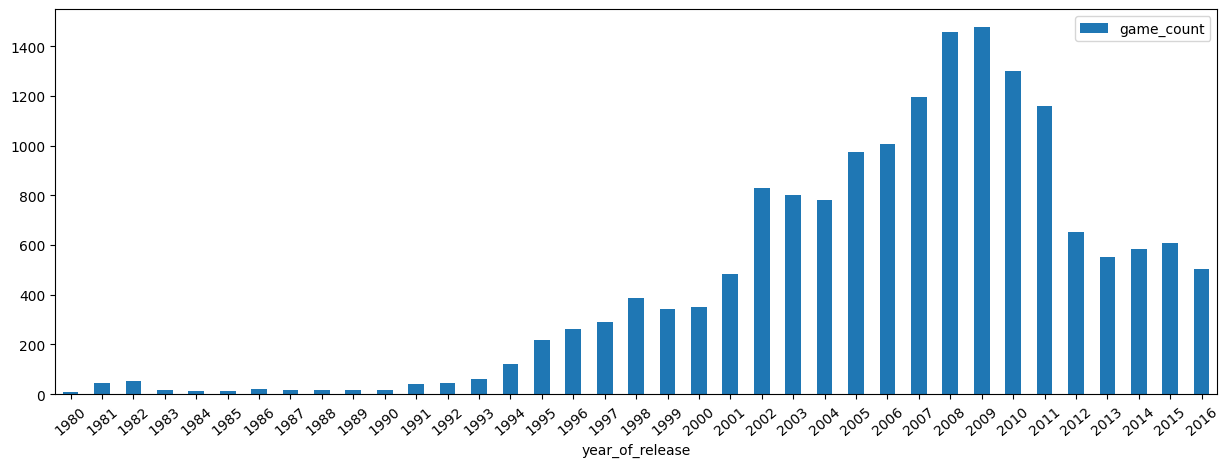

In [55]:
game_count.plot(kind='bar', rot=40, figsize=(15,5))

Jika dilihat dari grafiknya, jumlah game yang di rilis terus meningkat sampai puncaknya di tahun 2009 dan mulai mengalami penurunan di tahun berikutnya.

## Penjualan platform

### Penjualan platform tertinggi

In [56]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).head()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Penjualan tertinggi sampai tahun 2016 dimiliki oleh platform PS2.

### Distribusi penjualan platform tertinggi

                 total_sales
year_of_release             
2000                   39.17
2001                  166.43
2002                  205.38
2003                  184.31
2004                  211.81
2005                  182.87
2006                  103.42
2007                   75.99
2008                   53.90
2009                   26.40
2010                    5.64
2011                    0.45


<Axes: xlabel='year_of_release'>

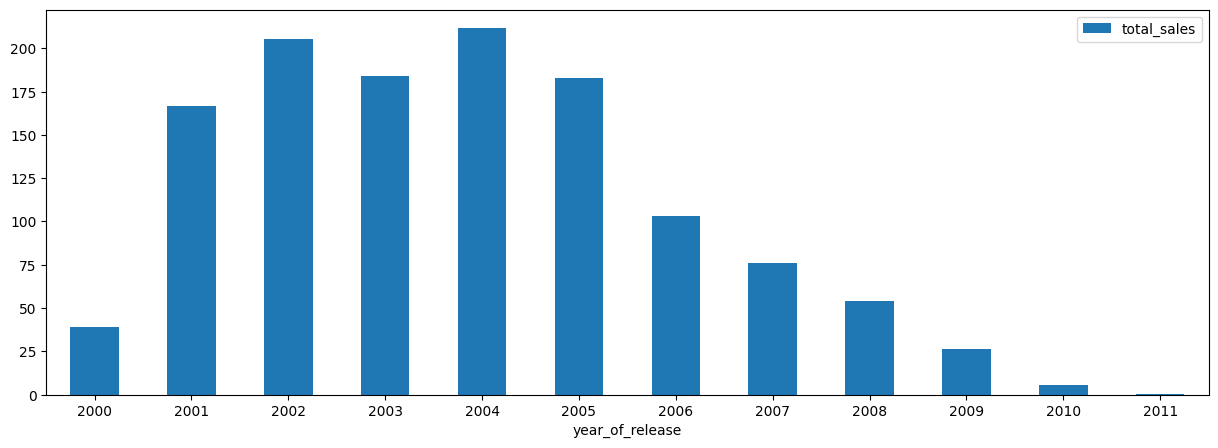

In [57]:
ps2 = df.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
print(ps2)
ps2.plot(kind='bar', figsize=(15,5), rot=0)

Penjualan tertinggi game PS2 pada tahun 2004 dan mengalami penurunan sampai penjualan terakhir pada tahun 2011.

In [58]:
# Pesaing PS2 di tahun 2011 keatas
ps2_rival = df.query('year_of_release >= 2011')
ps2_rival.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,165.09,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,57.76,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Mulai tahun 2011 penjualan PS2 dikalahkan oleh platform PS3 dan PS2 sudah tidak memiliki penjualan pada tahun 2012 keatas.

## Kapan platform pesaing muncul ?

In [59]:
# Melihat kapan munculnya platform baru
platform_release = df.pivot_table(index='platform', values='year_of_release', aggfunc='min').sort_values('year_of_release')

In [60]:
platform_release

,year_of_release
platform,
2600,1980
NES,1983
DS,1985
PC,1985
GB,1988
SNES,1990
GEN,1990
GG,1992
SCD,1993


Melihat data tahun rilis awal tiap platform, terdapat platform yang di rilis pada tahun yang sama.

In [61]:
# Mengelompokkan tahun rilis platform
platform_year = platform_release['year_of_release'].unique()
platform_year

array([1980, 1983, 1985, 1988, 1990, 1992, 1993, 1994, 1995, 1996, 1998,
       1999, 2000, 2001, 2004, 2005, 2006, 2011, 2012, 2013])

Setelah dikelompokkan berdasarkan tahun rilis platform dapat diketahui rentang waktu munculnya platform baru.

In [62]:
# Menghitung jarak tahun rilis platform
platform_year_diff = np.diff(platform_year)
platform_year_diff

array([3, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 5, 1, 1])

In [63]:
# Menghitung jarak tahun rata-rata platform baru di rilis
platform_year_diff.mean()

1.736842105263158

Sehingga diketahui rata-rata setiap 1.7 tahun atau 2 tahun di rilis platform game baru.

## Menentukan periode data untuk analisa

Text(0, 0.5, 'count')

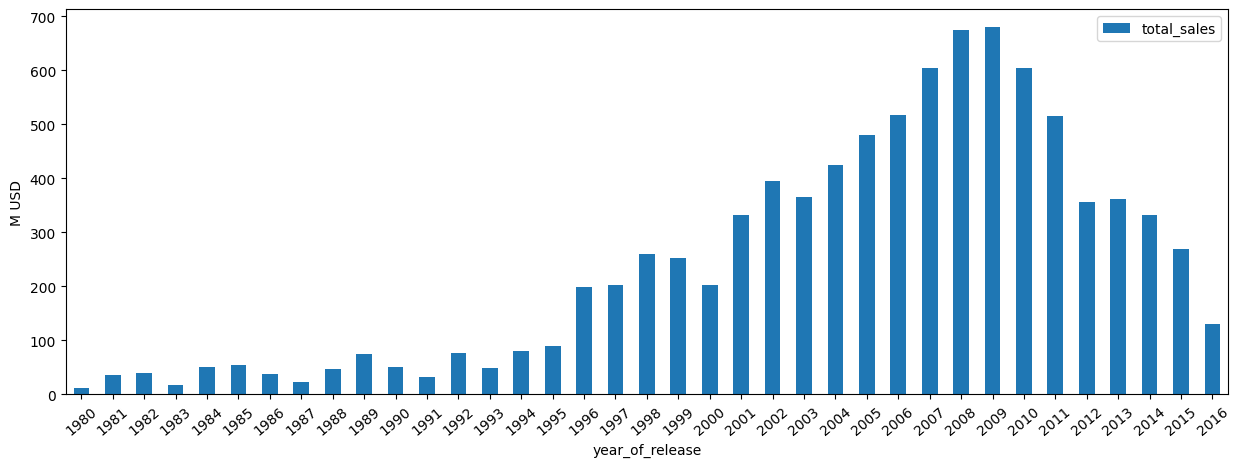

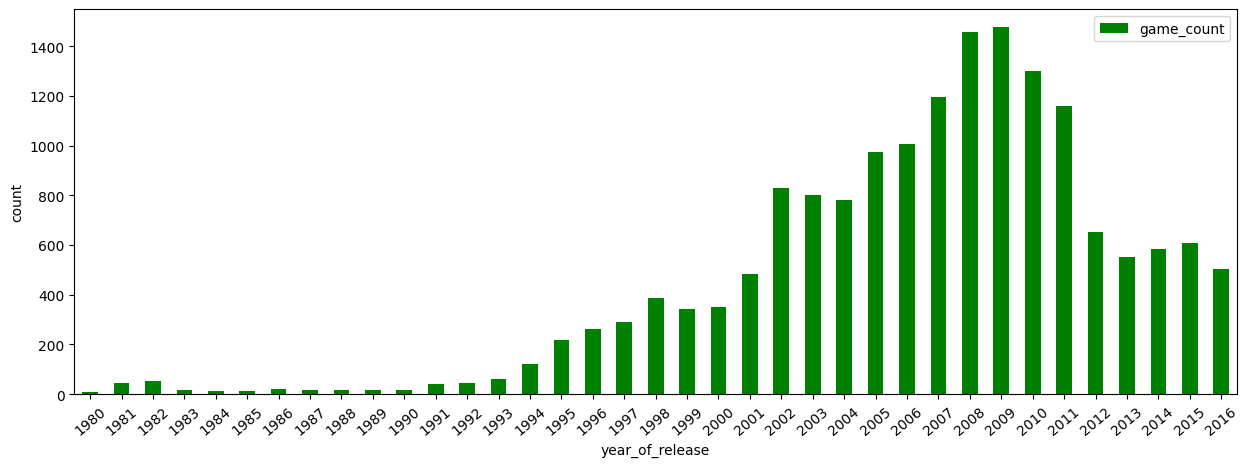

In [64]:
# Grafik total penjualan
yearly_sales = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

yearly_sales.plot(kind='bar', figsize=(15,5), rot=40)
plt.ylabel('M USD')

# Grafik jumlah rilis game
game_count.plot(kind='bar', figsize=(15,5), rot=40, color='green')
plt.ylabel('count')

Total penjualan game mulai meningkat pada tahun 2001 setelah sebelumnya mengalami penurunan di tahun 2000.

Jumlah game yang dirilis mulai meningkat pada tahun 2000 setelah sebelumnya mengalami penurunan di tahun 1999.

Maka periode yang diambil untuk analisa adalah tahun 2000 - 2016.

In [65]:
# Filter data
df1 = df.query('year_of_release > 1999')

## Penjualan platform

<Axes: xlabel='year_of_release'>

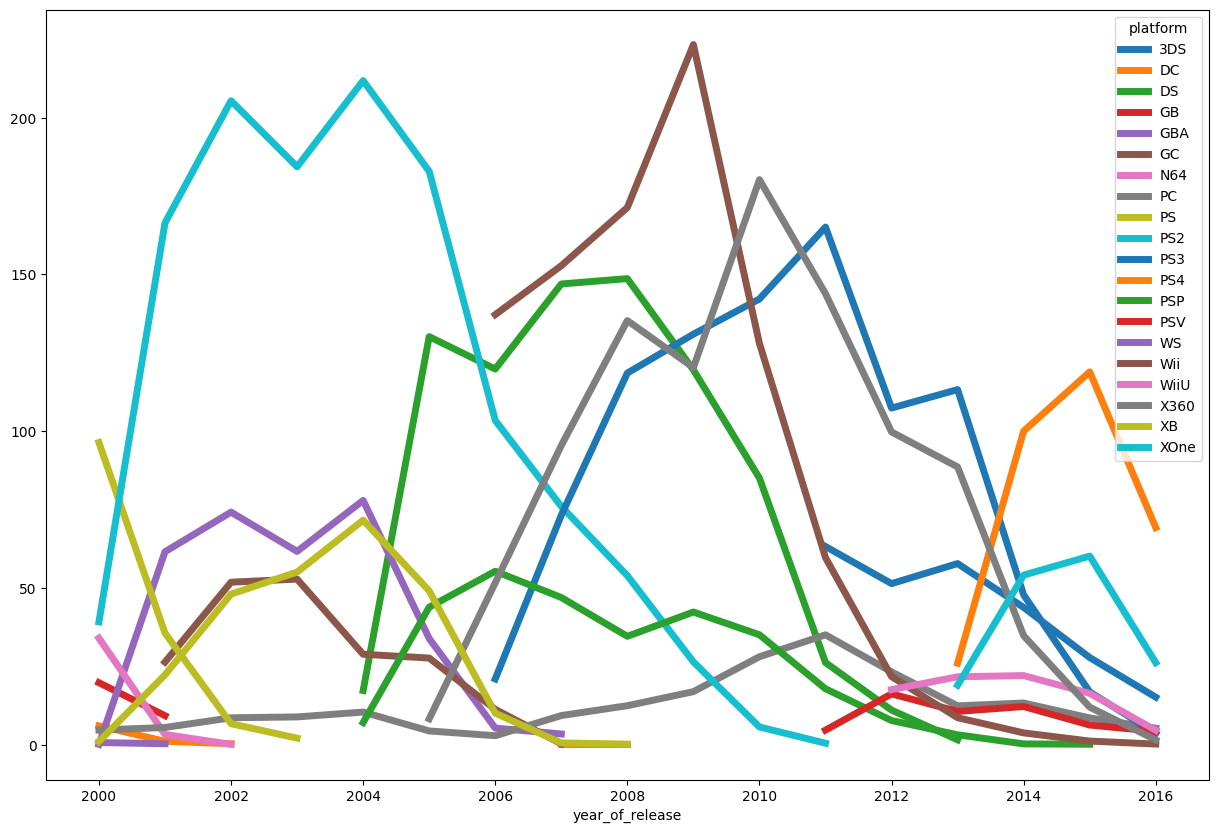

In [66]:
# Grafik penjualan 2000-2016
platform = df1.pivot_table(index='year_of_release', columns='platform', 
                    values='total_sales', aggfunc='sum')

platform.plot(linewidth=5 ,figsize=(15,10))

Semua platform mengalami penyusutan penjualan di tahun 2016.

In [67]:
table = df1.pivot_table(index='platform', columns='year_of_release', 
                        values='total_sales', aggfunc='sum', margins=True).iloc[:-1,:]

In [68]:
# 5 platform penjualan tertinggi
table.sort_values('All', ascending=False).head()

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,
PS2,39.17,166.43,205.38,184.31,211.81,182.87,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1255.77
X360,NaN,NaN,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,180.21,143.84,99.74,88.58,34.74,11.96,1.52,971.42
PS3,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,165.09,107.36,113.25,47.76,16.82,3.60,939.65
Wii,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,223.30,127.95,59.65,21.71,8.59,3.75,1.14,0.18,907.51
DS,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,148.65,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,806.10


Penjualan tertinggi periode tahun 2000 - 2016 diduduki oleh platform *PS2* di posisi pertama, pada posisi kedua diduduki platform *X360*, peringkat ketiga diduduki platform *PS3* dan peringkat ke empat dan lima diduduki platform *Wii dan DS*.

In [69]:
# 5 platform penjualan tertinggi di tahun 2016
table.sort_values(2016, ascending=False).head()

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,314.14
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14,26.15,159.32
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,57.76,43.76,27.78,15.14,259.00
PC,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,28.04,35.03,23.22,12.38,13.28,8.52,5.25,209.48
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60,82.19


Dengan mensortir penjualan tertinggi pada tahun 2016 dapat diketahui platform yang memiliki potensi menghasilkan keuntungan di tahun 2017. Platform tersebut adalah : *PS4, XOne, 3DS, PC, WiiU*.

(0.0, 3.0)

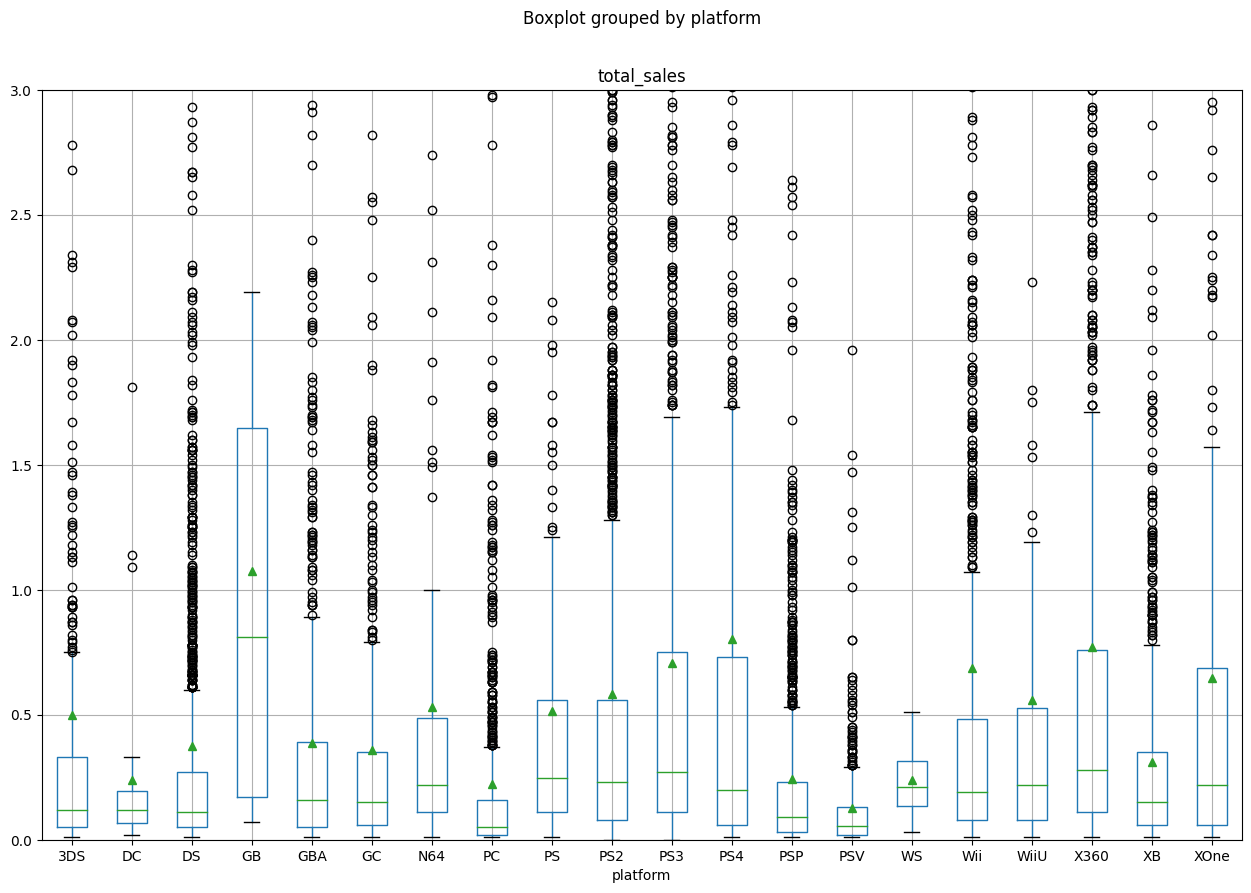

In [70]:
# Grafik boxplot platform
df1.boxplot(column='total_sales', by='platform', figsize=(15,10), showmeans=True)
plt.ylim(0,3)

Penjualan platform berbeda signifikan.

In [71]:
# Rata-rata penjualan game per platform
round(df1.pivot_table(index='platform', columns='year_of_release', values='total_sales', margins=True).iloc[:-1,:],2)

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.54,0.55,0.58,0.55,0.32,0.33,0.50
DC,0.30,0.13,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24
DS,NaN,NaN,NaN,NaN,0.75,1.10,0.60,0.39,0.28,0.30,0.26,0.17,0.48,0.19,NaN,NaN,NaN,0.37
GB,1.16,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.07
GBA,0.07,0.58,0.37,0.38,0.45,0.25,0.14,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.39
GC,NaN,1.20,0.34,0.33,0.35,0.28,0.28,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36
N64,0.57,0.36,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53
PC,0.67,0.36,0.45,0.27,0.35,0.12,0.05,0.15,0.16,0.16,0.26,0.25,0.38,0.33,0.28,0.17,0.10,0.22
PS,0.60,0.39,0.33,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.51


Rata-rata penjualan game per platform juga berbeda signifikan.

## Pengaruh ulasan pengguna dan para profesional pada penjualan platform

Melihat pengaruh `user_score` dan `critic_score` pada total penjualan platform terpopuler *PS2*.

In [72]:
# Fungsi grafik
def scatterplot(column) :
    data = df1.query('platform =="PS2"')
    corr = data[column].corr(data['total_sales'])
    data.plot(x=column, y='total_sales', kind='scatter', figsize=(10,5), alpha=0.3)
    plt.ylim(0,3)
    print('Nilai korelasi :', corr)

### Pengaruh critic_score pada total_sales

Nilai korelasi : 0.3713080916282162


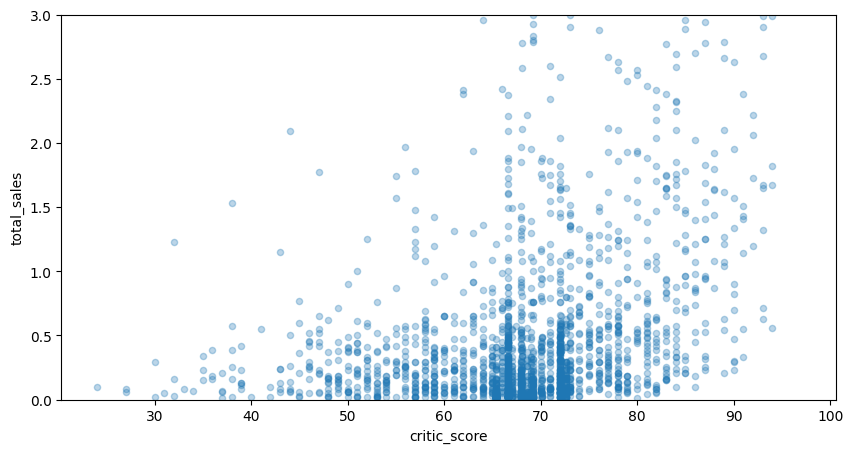

In [73]:
scatterplot('critic_score')

Ulasan para profesional (`critic_score`) memiliki korelasi lemah positif terhadap total penjualan (`total_sales`).

### Pengaruh user_score pada total_sales

Nilai korelasi : 0.21052653011248174


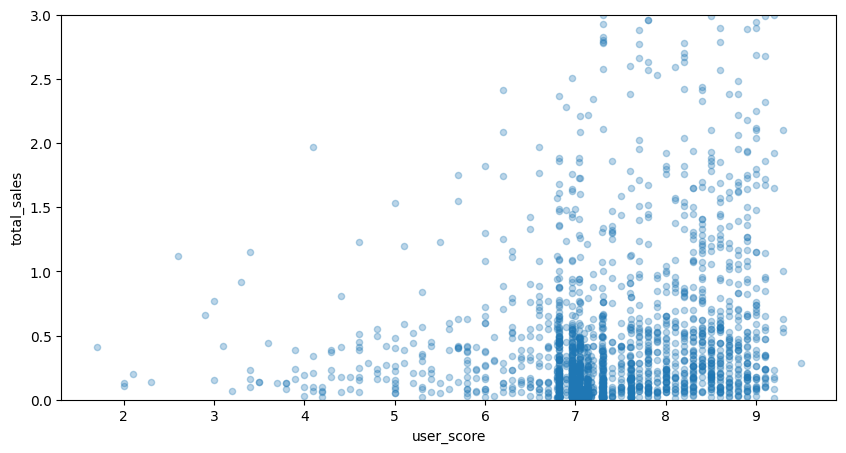

In [74]:
scatterplot('user_score')

Ulasan para pengguna (`user_score`) memiliki korelasi lemah positif terhadap total penjualan (`total_sales`).

## Penjualan game yang sama pada platform lain

Melihat penjualan game platform *PS2* yang sama pada platform lain.

In [75]:
# Memfilter 2 dataset
ps2_game = df1.query('platform == "PS2"').pivot_table(index='name', columns='platform', 
                                                      values='total_sales', aggfunc='sum')

nonps2_game = df1.query('platform != "PS2"').pivot_table(index='name', columns='platform',
                                                      values='total_sales', aggfunc='sum').fillna(0)

In [76]:
# Menggabungkan data hanya dengan nama game yang sama di PS2 dan platform lain
all_platform_ps2_game = pd.merge(ps2_game, nonps2_game, how='inner', on='name')

In [77]:
# Menampilkan top 5 penjualan game di PS2 terhadap platform lain
all_platform_ps2_game.sort_values('PS2', ascending=False).head()

platform,PS2,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,
Grand Theft Auto: San Andreas,20.81,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11,1.96,0.0
Grand Theft Auto: Vice City,16.15,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Grand Theft Auto III,13.10,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Need for Speed Underground,7.20,0.0,0.0,0.00,0.0,0.30,1.21,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.71,0.0
Need for Speed Underground 2,6.90,0.0,0.0,0.14,0.0,0.44,1.13,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.28,0.0


Pada nama game yang sama penjualan berbeda secara signifikan dengan platform lain. Kemungkinan disebabkan oleh pengguna platform PS2 lebih banyak daripada platform lainnya.

In [78]:
# Reshape table
table = all_platform_ps2_game.stack().reset_index()
table_pvt = table.pivot_table(index='platform', values=0, aggfunc='sum').sort_values(0, ascending=False)

               0
platform        
PS2       798.65
XB        164.58
X360      145.38
PS3       125.75
Wii       123.91
PSP        86.94
GC         86.32
DS         64.43
GBA        60.99
PS         18.95
PC          4.76
3DS         2.84
DC          2.29
N64         1.90
GB          1.73
PSV         1.14
WiiU        0.32
PS4         0.06
WS          0.00
XOne        0.00


Text(0, 0.5, 'M USD')

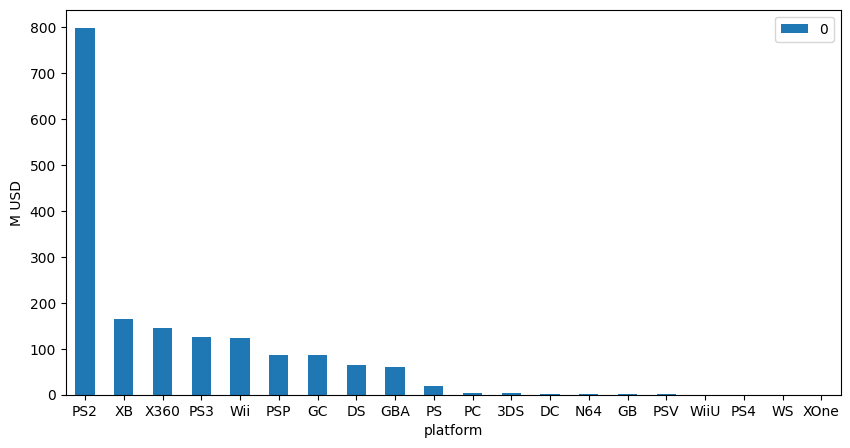

In [79]:
# Grafik total penjualan game yang sama pada platform lain
print(table_pvt)
table_pvt.plot(kind='bar', rot=0, figsize=(10,5))
plt.ylabel('M USD')

Penjualan game yang sama pada platform lain terlihat berbeda secara signifikan.

## Penjualan genre 

<Axes: xlabel='year_of_release'>

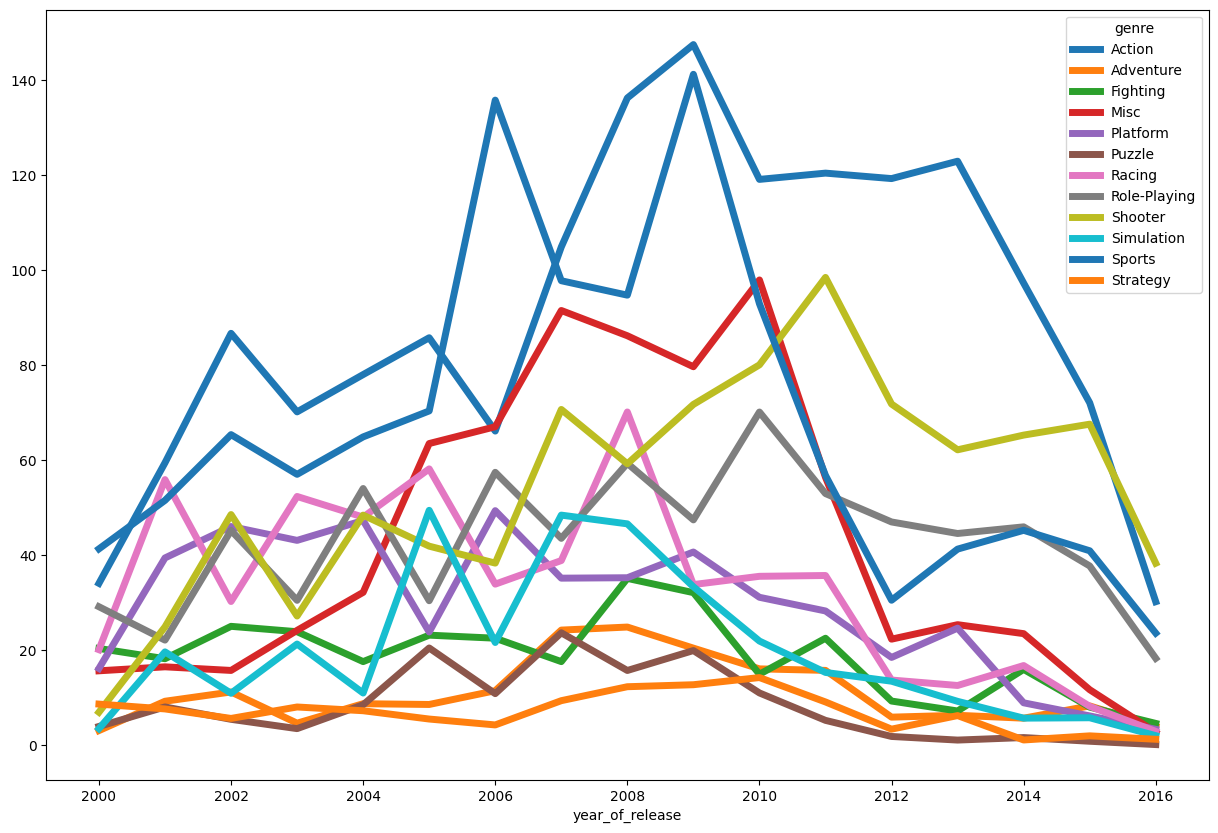

In [80]:
# Grafik penjualan 2000-2016
genre = df1.pivot_table(index='year_of_release', columns='genre', 
                    values='total_sales', aggfunc='sum')

genre.plot(linewidth=5 ,figsize=(15,10))

Semua genre mengalami penyusutan penjualan sampai tahun 2016.

In [81]:
tables = df1.pivot_table(index='genre', columns='year_of_release', 
                        values='total_sales', aggfunc='sum', margins=True).iloc[:-1,:]

In [82]:
# top 5 Genre penjualan tertinggi
tables.sort_values('All', ascending=False).head()

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
genre,,,,,,,,,,,,,,,,,,
Action,33.98,59.38,86.65,70.10,77.96,85.72,66.06,104.85,136.23,147.48,119.08,120.40,119.25,122.91,97.23,72.02,30.11,1549.41
Sports,41.24,51.46,65.31,56.94,64.83,70.30,135.78,97.73,94.69,141.22,92.89,56.71,30.42,41.19,45.15,40.84,23.49,1150.19
Shooter,6.83,24.81,48.47,27.09,48.35,41.81,38.24,70.61,59.16,71.67,80.01,98.43,71.75,62.11,65.21,67.51,38.22,920.28
Role-Playing,29.05,22.02,45.13,30.40,53.96,30.32,57.37,43.46,59.26,47.35,70.07,52.89,46.91,44.48,45.88,37.64,18.18,734.37
Misc,15.55,16.39,15.63,24.07,32.08,63.43,66.97,91.46,86.14,79.61,97.89,56.31,22.22,25.27,23.38,11.57,2.60,730.57


Penjualan tertinggi periode tahun 2000 - 2016 diduduki oleh genre *Action* di posisi pertama, pada posisi kedua diduduki platform *Sports*, peringkat ketiga diduduki genre *Shooter* dan peringkat ke empat dan lima diduduki genre *Role-Playing dan Misc*.

In [83]:
# Top 5 Genre penjualan tertinggi di tahun 2016
tables.sort_values(2016, ascending=False).head()

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
genre,,,,,,,,,,,,,,,,,,
Shooter,6.83,24.81,48.47,27.09,48.35,41.81,38.24,70.61,59.16,71.67,80.01,98.43,71.75,62.11,65.21,67.51,38.22,920.28
Action,33.98,59.38,86.65,70.10,77.96,85.72,66.06,104.85,136.23,147.48,119.08,120.40,119.25,122.91,97.23,72.02,30.11,1549.41
Sports,41.24,51.46,65.31,56.94,64.83,70.30,135.78,97.73,94.69,141.22,92.89,56.71,30.42,41.19,45.15,40.84,23.49,1150.19
Role-Playing,29.05,22.02,45.13,30.40,53.96,30.32,57.37,43.46,59.26,47.35,70.07,52.89,46.91,44.48,45.88,37.64,18.18,734.37
Fighting,20.26,18.10,24.92,23.79,17.49,23.06,22.42,17.49,35.02,32.02,14.83,22.41,9.18,7.09,15.85,7.90,4.47,316.30


Dengan mensortir penjualan tertinggi pada tahun 2016 dapat diketahui genre yang memiliki potensi menghasilkan keuntungan di tahun 2017. Genre tersebut adalah : *Shooter, Action, Sports, Role-Playing dan Fighting*.

Dengan membandingkan genre terpopuler tahun 2000 - 2016 dengan tahun 2016 diketahui bahwa genre yang paling diminati adalah *Shooter, Action, Sports, Role-Playing*.

## Profil pengguna wilayah NA, EU dan JP

Melihat profil pengguna dari data tahun 2000 - 2016 pada wilayah NA, EU dan JP.

In [84]:
df1.pivot_table(index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
               aggfunc='sum', margins=True)

,eu_sales,jp_sales,na_sales,other_sales,total_sales
year_of_release,,,,,
2000,52.77,42.77,94.50,11.62,201.66
2001,94.89,39.86,173.98,22.73,331.46
2002,109.75,41.76,216.19,27.27,394.97
2003,104.86,35.21,198.55,26.09,364.71
2004,108.58,41.65,227.14,47.48,424.85
2005,127.77,55.93,253.07,43.26,480.03
2006,127.89,73.74,262.13,53.95,517.71
2007,157.82,60.29,309.89,76.75,604.75
2008,181.62,60.80,350.78,81.64,674.84


Ketiga wilayah ini merupakan wilayah dengan penjualan terbesar.

In [85]:
# Fungsi top5
def top5(index, value) :
    table = df1.pivot_table(index=index, values=value, columns='year_of_release',
                   aggfunc='sum', margins=True).fillna(0).iloc[:-1,:].sort_values('All', ascending=False).head(5)
    return table

# Fungsi rating
def rating(value) :
    table = df1.pivot_table(index='rating', values=value, columns='year_of_release',
                   aggfunc='sum', margins=True).fillna(0).iloc[:-1,:].sort_values('All', ascending=False)
    return table

### Profil pengguna wilayah NA (North America)

In [86]:
top5('platform', 'na_sales')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,
X360,0.00,0.00,0.00,0.00,0.00,6.90,35.16,62.99,82.51,74.00,114.11,86.75,58.39,53.36,20.25,7.36,0.69,602.47
PS2,16.08,79.49,96.54,83.54,96.78,96.52,49.93,32.05,21.23,9.36,2.19,0.13,0.00,0.00,0.00,0.00,0.00,583.84
Wii,0.00,0.00,0.00,0.00,0.00,0.00,70.86,83.14,97.12,124.58,72.64,31.11,10.89,4.48,1.59,0.43,0.06,496.90
PS3,0.00,0.00,0.00,0.00,0.00,0.00,8.84,32.16,57.23,62.65,60.99,68.24,39.88,41.45,16.39,4.99,0.67,393.49
DS,0.00,0.00,0.00,0.00,8.33,47.99,50.01,75.25,80.21,60.95,40.80,14.27,4.02,0.57,0.00,0.00,0.00,382.40


Top 5 platform wilayah NA : *X360, PS2, Wii, PS3 dan DS*.

In [87]:
top5('genre', 'na_sales')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
genre,,,,,,,,,,,,,,,,,,
Action,17.79,29.81,47.81,39.08,40.23,49.71,38.27,58.43,72.88,76.44,61.62,54.42,51.79,53.70,38.85,24.39,9.29,764.51
Sports,22.75,28.80,35.17,32.21,39.57,41.93,72.78,47.59,48.62,73.61,49.30,27.33,16.26,19.14,19.82,18.77,7.54,601.19
Shooter,4.00,15.11,28.69,16.13,31.39,27.97,23.02,38.85,34.89,40.18,44.50,49.83,35.03,30.76,30.84,31.94,16.24,499.37
Misc,7.14,9.96,8.49,10.92,17.92,28.13,25.90,47.55,47.22,42.58,56.23,32.74,10.70,12.44,9.47,4.82,0.76,372.97
Role-Playing,7.20,7.46,20.43,13.81,21.56,12.60,24.22,19.60,25.00,18.78,28.52,19.78,17.60,12.93,13.76,13.93,5.89,283.07


Top 5 genre wilayah NA : *Action, Sports, Shooter, Misc, dan Role-Playing*.

In [88]:
rating('na_sales')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
rating,,,,,,,,,,,,,,,,,,
E,24.05,85.84,94.44,78.15,99.44,83.77,132.99,127.06,134.92,134.76,101.84,56.09,35.32,28.43,24.15,18.62,7.97,1267.84
M,1.93,26.88,29.61,20.04,44.16,33.04,27.78,43.95,61.74,58.64,76.20,77.76,66.36,68.79,49.39,31.36,15.67,733.30
T,20.83,39.01,59.11,63.51,49.38,56.49,52.82,67.91,76.36,69.32,55.26,45.02,16.23,11.02,16.20,13.91,8.95,721.33
Not Rated,47.69,22.25,33.03,36.46,31.94,50.68,20.75,35.24,28.02,35.44,32.20,20.48,13.89,24.98,27.28,28.91,8.53,497.77
E10+,0.00,0.00,0.00,0.39,2.22,27.62,27.79,35.73,49.74,49.13,42.36,42.38,21.46,21.27,15.36,14.06,3.81,353.32
EC,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.19,0.71,0.42,0.00,0.00,0.00,0.00,0.00,1.53
AO,0.00,0.00,0.00,0.00,0.00,1.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.26
RP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Rating ESRB berpengaruh pada penjualan wilayah NA.

### Profil pengguna wilayah EU (Europe)

In [89]:
top5('platform', 'eu_sales')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,
PS2,10.64,52.37,65.27,61.2,56.01,47.52,21.61,10.43,7.63,4.94,1.54,0.13,0.00,0.00,0.00,0.00,0.00,339.29
PS3,0.00,0.00,0.00,0.0,0.00,0.00,7.38,26.10,38.73,41.40,50.50,59.32,39.05,42.27,18.24,6.04,1.26,330.29
X360,0.00,0.00,0.00,0.0,0.00,0.43,10.84,22.17,38.16,33.31,48.75,42.58,32.00,27.03,11.28,3.50,0.71,270.76
Wii,0.00,0.00,0.00,0.0,0.00,0.00,43.62,43.96,46.52,62.20,36.31,17.68,5.99,3.34,1.86,0.62,0.11,262.21
DS,0.00,0.00,0.00,0.0,3.93,41.49,23.07,33.79,32.72,25.83,18.82,5.71,2.68,0.85,0.00,0.00,0.00,188.89


Top 5 platform wilayah EU : *PS2, PS3, X360, Wii dan DS*.

In [90]:
top5('genre', 'eu_sales')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
genre,,,,,,,,,,,,,,,,,,
Action,10.84,19.25,27.01,21.34,16.62,21.98,15.03,25.08,38.95,41.32,36.03,41.04,41.21,43.64,39.86,24.14,10.68,474.02
Sports,9.77,14.14,19.24,16.16,14.98,17.47,40.06,26.30,26.68,42.14,28.68,19.74,8.57,14.79,17.91,15.81,12.01,344.45
Shooter,2.17,7.50,14.98,8.54,13.07,9.29,8.73,21.81,16.05,21.69,24.73,34.59,25.61,22.36,25.24,24.38,15.90,296.64
Misc,4.91,4.25,3.56,7.52,9.55,20.78,19.26,20.62,20.73,20.75,26.76,13.84,6.28,7.18,8.60,3.60,0.66,198.85
Racing,6.50,17.89,8.89,17.24,12.47,16.43,8.76,13.01,23.99,12.89,14.77,13.77,7.10,6.06,7.61,4.75,1.77,193.90


Top 5 genre wilayah EU : *Action, Sports, Shooter, Misc dan Racing*.

In [91]:
rating('eu_sales')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
rating,,,,,,,,,,,,,,,,,,
E,15.23,45.21,42.66,38.45,41.31,52.40,68.01,66.47,65.15,64.33,55.72,28.89,29.67,25.32,23.23,21.22,13.61,696.88
M,1.74,14.51,17.29,10.27,15.35,15.24,13.04,23.21,36.15,34.46,44.04,57.05,48.64,51.88,47.90,29.00,16.54,476.31
T,13.59,20.63,33.48,33.87,33.26,23.46,17.55,30.27,34.36,41.60,31.28,31.12,11.01,7.88,13.80,10.53,9.79,397.48
Not Rated,22.21,14.54,16.32,22.12,17.35,27.38,18.69,19.65,22.64,27.17,22.92,25.44,12.59,19.96,23.24,28.24,7.47,347.93
E10+,0.00,0.00,0.00,0.15,1.31,8.57,10.60,18.22,23.32,25.33,21.92,23.52,12.68,16.72,14.62,7.73,3.81,188.50
AO,0.00,0.00,0.00,0.00,0.00,0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.61
EC,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11
RP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.00,0.00,0.00,0.00,0.00,0.08


Rating ESRB berpengaruh pada penjualan wilayah EU.

### Profil pengguna wilayah JP (Japan)

In [92]:
top5('platform', 'jp_sales')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,
DS,0.00,0.00,0.00,0.00,3.65,29.86,38.56,26.81,24.56,24.21,19.86,4.32,3.72,0.00,0.00,0.00,0.00,175.55
PS2,8.87,17.79,21.85,18.88,19.17,16.71,17.64,9.82,5.73,1.94,0.71,0.09,0.00,0.00,0.00,0.00,0.00,139.20
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.83,19.98,23.62,20.69,15.52,8.03,100.67
PS3,0.00,0.00,0.00,0.00,0.00,0.00,1.08,4.22,5.82,9.03,9.87,14.88,11.94,12.13,6.25,3.67,1.30,80.19
PSP,0.00,0.00,0.00,0.00,2.03,3.22,4.39,5.78,10.07,9.09,18.16,13.57,7.18,2.93,0.24,0.12,0.00,76.78


Top 5 platform wilayah JP : *DS, PS2, 3DS, PS3 dan PSP*.

In [93]:
top5('genre', 'jp_sales')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
genre,,,,,,,,,,,,,,,,,,
Role-Playing,15.80,9.55,13.64,9.74,13.49,10.38,19.83,12.43,17.77,17.11,23.67,14.49,14.40,19.91,17.82,6.80,6.61,243.44
Action,3.74,5.99,5.10,4.46,4.82,6.41,5.78,6.13,6.04,12.21,8.58,11.46,12.31,10.91,6.53,15.98,7.07,133.52
Misc,2.77,1.26,2.90,3.58,2.43,7.96,15.74,11.46,7.31,6.81,6.70,4.74,3.66,3.59,2.42,2.15,1.04,86.52
Sports,6.36,3.90,4.69,4.00,4.42,3.59,8.69,9.59,5.47,10.07,4.43,3.08,2.60,2.17,1.61,0.73,0.92,76.32
Platform,2.56,3.54,4.52,2.22,6.11,1.24,9.21,2.98,2.36,4.84,3.68,3.50,3.84,2.10,1.27,1.31,0.11,55.39


Top 5 genre wilayah JP : *Role-Playing, Action, Misc, Sports dan Platform*.

In [94]:
rating('jp_sales')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
rating,,,,,,,,,,,,,,,,,,
Not Rated,31.07,15.91,22.86,17.93,18.45,16.04,31.92,24.17,22.56,28.94,33.35,29.46,23.79,28.20,24.01,18.57,14.32,401.55
E,2.64,11.89,9.20,6.91,11.94,27.02,25.30,17.89,15.77,13.62,11.20,8.35,13.19,6.20,3.69,4.18,1.07,190.06
T,8.38,8.34,7.14,7.87,7.96,7.95,9.16,10.23,13.92,8.50,8.76,7.41,5.43,5.81,7.15,5.43,2.27,131.71
M,0.68,3.72,2.56,2.33,2.32,2.44,2.70,1.76,3.70,5.18,4.32,5.59,7.09,6.10,3.72,3.09,1.20,58.50
E10+,0.00,0.00,0.00,0.17,0.98,2.48,4.66,6.24,4.85,7.60,1.99,3.04,2.30,1.43,1.19,2.82,0.45,40.20
AO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
EC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
RP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Rating ESRB tidak berpengaruh pada penjualan wilayah JP.

### Kesimpulan

Berdasarkan data penjualan tahun 2000 - 2016 diketahui preferensi pengguna yang berbeda pada wilayah NA, EU dan JP :

 1. Top 5 platform :
    
    a. Wilayah North America (NA) : *X360, PS2, Wii, PS3, DS*.
    
    b. Wilayah Europe (EU) : *PS2, PS3, X360, Wii, DS*.
    
    c. Wilayah Japan (JP) : *DS, PS2, 3DS, PS3, PSP*.

 2. Top 5 genre :
    
    a. Wilayah North America (NA) : *Action, Sports, Shooter, Misc, Role-Playing*.
    
    b. Wilayah Europe (EU) : *Action, Sports, Shooter, Misc, Racing*.
    
    c. Wilayah Japan (JP) : *Role-Playing, Action, Misc, Sports, Platform*.

 3. Pengaruh rating ESRB :
    
    a. Wilayah North America (NA) : Berpengaruh terhadap penjualan.
    
    b. Wilayah Europe (EU) : Berpengaruh terhadap penjualan.
    
    c. Wilayah Japan (JP) : Tidak berpengaruh terhadap penjualan.


# Pengujian hipotesis statistik

## Apakah rata-rata rating pengguna platform Xbox One dan PC adalah sama ?

H0 = Rata-rata rating pengguna platform Xbox One dan PC sama.

Ha = Rata-rata rating pengguna platform Xbox One dan PC berbeda.

In [95]:
# Filter data dan cek varians
XOne_rtg = df1.query('platform == "XOne"').groupby('year_of_release')['user_score'].mean()
PC_rtg = df1.query('platform == "PC"').groupby('year_of_release')['user_score'].mean()
print('Varians XOne :', np.var(XOne_rtg))
print('Varians PC :', np.var(PC_rtg))

Varians XOne : 0.11674897201686261
Varians PC : 0.39868677878191244


In [96]:
# Uji hipotesis
result = st.ttest_ind(XOne_rtg, PC_rtg, equal_var=False)

alpha = 0.05

print('p-value:', result.pvalue)

if result.pvalue < alpha : 
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.024688053021085454
Kita menolak hipotesis nol


Rata-rata rating pengguna platform Xbox One dan PC berbeda.

## Apakah rata-rata rating pengguna genre Action dan Sports berbeda ?

H0 = Rata-rata rating pengguna genre Action dan Sports sama.

Ha = Rata-rata rating pengguna genre Action dan Sports berbeda.

In [97]:
# Filter data dan cek varians
action_rtg = df1.query('genre == "Action"').groupby('year_of_release')['user_score'].mean()
sports_rtg = df1.query('genre == "Sports"').groupby('year_of_release')['user_score'].mean()
print('Varians XOne :', np.var(action_rtg))
print('Varians PC :', np.var(sports_rtg))

Varians XOne : 0.04375957540648646
Varians PC : 0.4775730359602831


In [98]:
# Uji hipotesis
results = st.ttest_ind(action_rtg, sports_rtg, equal_var=False)

alpha = 0.05

print('p-value:', result.pvalue)

if results.pvalue < alpha : 
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.024688053021085454
Kita tidak dapat menolak hipotesis nol


Rata-rata rating pengguna genre Action dan Sports sama.

# Kesimpulan

Dataset merupakan informasi penjualan sampai tahun 2016.

Dimana setiap kolomnya memiliki informasi :

— Name : Judul games.

— Platform : Media games dimainkan.

— Year_of_Release : Tahun games di rilis.

— Genre : Jenis aliran games.

— NA_sales : Penjualan di Amerika Utara dalam satuan juta USD.

— EU_sales : Penjualan di Eropa dalam satuan juta USD.

— JP_sales : Penjualan di Jepang dalam satuan juta USD.

— Other_sales : Penjualan di negara lainnya dalam satuan juta USD.

— Critic_Score : Skor ulasan dari kritikus, maksimal 100.

— User_Score : skor ulasan dari pengguna, maksimal 10.

— Rating : Peringkat Entertainment Software Rating Board (ESRB)

Tidak terdapat dulplikat eksplisit dalam data.

Perbaikan yang dilakukan pada data :

   1. Nama kolom diubah menjadi lower_case.
    
   2. Nilai yang hilang pada kolom `name` di isi dengan *unknown*, kemungkinan nama game tidak ditulis menggunakan huruf alphabet.
    
   3. Nilai yang hilang pada kolom `year_of_release` di isi dengan nilai median per `platform`.
   
   4. Nilai yang hilang pada kolom `genre` di isi dengan *Misc*.
    
   5. Nilai yang hilang pada kolom `critic_score` di isi dengan nilai rata-rata per `genre`.
   
   6. Tipe data kolom `user_score` diganti menjadi float.
    
   7. Nilai yang hilang pada kolom `user_score` dan *tbd* di ganti dengan nilai rata-rata per `genre`.
    
   8. Nilai yang hilang pada kolom `rating` di isi dengan *Not Rated*.
   
   9. Menghapus kolom `year_change, critic_change, user_change`.
   
   10. Tipe data kolom `year_of_release` diganti menjadi int.
   
Penambahan informasi pada data : Menambah kolom `sales_total`, total sales dari semua wilayah.

Jumlah game yang di rilis terus meningkat sampai puncaknya di tahun 2009 dan terus mengalami penurunan sampai tahun 2016.

Platform *PS2* memiliki penjualan tertinggi di dalam dataset.

Platform *PS2* mulai dijual dari tahun 2000 - 2011, dimana puncak penjualannya di tahun 2004 sebesar 212 juta USD. Penjualan terakhir game *PS2* di tahun 2011 dan dikalahkan oleh platform baru *PS3*.

Total penjualan semua game platform mulai meningkat pada tahun 2001 setelah sebelumnya mengalami penurunan di tahun 2000.

Jumlah game yang dirilis mulai meningkat pada tahun 2000 setelah sebelumnya mengalami penurunan di tahun 1999.

Maka periode yang diambil untuk analisa adalah tahun 2000 - 2016. Periode ini dipilih dengan harapan akan mencerminkan pertumbuhan dan penurunan penjualan platform game.

Pada penjualan platform tahun 2000 - 2016, semua platform mengalami penurunan penjualan di tahun 2016.

Pada periode ini *PS2* memiliki penjualan tertinggi.

Dengan mensortir penjualan tertinggi pada tahun 2016 dapat diketahui platform yang memiliki potensi menghasilkan keuntungan di tahun 2017. Platform tersebut adalah : *PS4, XOne, 3DS, PC, WiiU*.

Total penjualan dan rata-rata penjualan tiap platform berbeda signifikan.

Dengan mengambil platform *PS2* sebagai acuan data, diketahui bahwa :

   1. Ulasan para profesional (`critic_score`) memiliki korelasi lemah positif terhadap total penjualan (`total_sales`).

   2. Ulasan para pengguna (`user_score`) memiliki korelasi lemah positif terhadap total penjualan (`total_sales`).

Pada nama game *PS2* yang sama dengan platform lain, penjualan berbeda secara signifikan dengan platform lain. Kemungkinan disebabkan oleh pengguna platform PS2 lebih banyak daripada platform lainnya.

Pada penjualan genre tahun 2000 - 2016, semua platform mengalami penurunan penjualan di tahun 2016.

Pada periode ini genre *Action, Sports, Shooter, Role-Playing, Misc* memiliki penjualan tertinggi.

Dengan mensortir penjualan tertinggi pada tahun 2016 dapat diketahui genre yang memiliki potensi menghasilkan keuntungan di tahun 2017. Genre tersebut adalah : *Shooter, Action, Sports, Role-Playing, Fighting*.

Dengan membandingkan genre terpopuler tahun 2000 - 2016 dengan tahun 2016 diketahui bahwa genre yang paling diminati adalah *Shooter, Action, Sports, Role-Playing*.

Preferensi pengguna di wilayah NA, EU dan JP berbeda, ketiga wilayah tersebut merupakan 3 wilayah penjualan terbesar.

Berdasarkan data penjualan tahun 2000-2016 diketahui preferensi pengguna pada wilayah NA, EU dan JP :

    1. Top 5 platform :
    
       a. Wilayah North America (NA) : *X360, PS2, Wii, PS3, DS*.
    
       b. Wilayah Europe (EU) : *PS2, PS3, X360, Wii, DS*.
    
       c. Wilayah Japan (JP) : *DS, PS2, 3DS, PS3, PSP*.

    2. Top 5 genre :
    
       a. Wilayah North America (NA) : *Action, Sports, Shooter, Misc, Role-Playing*.
    
       b. Wilayah Europe (EU) : *Action, Sports, Shooter, Misc, Racing*.
    
       c. Wilayah Japan (JP) : *Role-Playing, Action, Misc, Sports, Platform*.

    3. Pengaruh rating ESRB :
    
       a. Wilayah North America (NA) : Berpengaruh terhadap penjualan.
    
       b. Wilayah Europe (EU) : Berpengaruh terhadap penjualan.
    
       c. Wilayah Japan (JP) : Tidak berpengaruh terhadap penjualan.


Setelah dilakukan pengujian hipotesis statistik atas pertanyaan yang diajukan diketahui :

    1. Rata-rata rating pengguna platform Xbox One dan PC berbeda.

    2. Rata-rata rating pengguna genre Action dan Sports sama.
